# CSE474/574 - Programming Assignment 2

## Part 3 - Image Classification with Deep[er] neural networks

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=55f03fcc67abfe4aa42910d92267d43a21dff6e52c4e9dd0dd6a7947cf377a33
  Stored in directory: c:\users\manan\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [42]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [44]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

In [45]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [46]:
n_classes = len(np.unique(train_label))
# convert labels to 0-1 hot encoding
train_label_01 = np.zeros((train_label.shape[0], n_classes))
a = np.arange(train_label.shape[0], dtype=np.int64)
b = np.array(train_label, dtype=np.int64).reshape((train_label.shape[0],))
train_label_01[a, b] = 1

test_label_01 = np.zeros((test_label.shape[0], n_classes))
c = np.arange(test_label.shape[0], dtype=np.int64)
d = np.array(test_label, dtype=np.int64).reshape((test_label.shape[0],))
test_label_01[c, d] = 1

In [47]:
**WARNING**: This cell will take a significantly long time to run

SyntaxError: invalid syntax (<ipython-input-47-fdb76f3823c0>, line 1)

In [52]:
model = Sequential()
M = 80
L = 4
activation = 'tanh' # other options 'relu', 'tanh'
# this is the first hidden layer
model.add(Dense(M, activation=activation, input_dim=train_data.shape[1]))
# you can add more Dense layers here
for l in range(1,L):
    model.add(Dense(M, activation=activation, input_dim=M))
# this is the output layer
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 80)                62800     
_________________________________________________________________
dense_32 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_33 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_34 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                810       
Total params: 83,050
Trainable params: 83,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
st = time.time()
model.fit(train_data, train_label_01, epochs=50, batch_size=32)
en = time.time()
print("Training completed in {:.2f} seconds.".format(en-st))

Epoch 1/50
782/782 [==============================] - 4s 3ms/step - loss: 1.5771 - accuracy: 0.4600
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.1331 - accuracy: 0.6249
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.0751 - accuracy: 0.6409
Epoch 4/50
782/782 [==============================] - 3s 3ms/step - loss: 0.9943 - accuracy: 0.6721
Epoch 5/50
782/782 [==============================] - 3s 3ms/step - loss: 0.9726 - accuracy: 0.6817
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 0.9232 - accuracy: 0.6959
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 0.9286 - accuracy: 0.6976
Epoch 8/50
782/782 [==============================] - 3s 4ms/step - loss: 0.8900 - accuracy: 0.7088
Epoch 9/50
782/782 [==============================] - 3s 4ms/step - loss: 0.8730 - accuracy: 0.7154
Epoch 10/50
782/782 [==============================] - 3s 4ms/step - loss: 0.8714 - accuracy: 0.7146

In [55]:
train_predicted = model.predict_classes(train_data)
acc_train = np.where(train_label == train_predicted)[0].shape[0]/train_data.shape[0]
print('Training set Accuracy: {:.2f}%'.format(100 * acc_train))

test_predicted = model.predict_classes(test_data)
acc_test = np.where(test_label == test_predicted)[0].shape[0]/test_data.shape[0]
print('Testing set Accuracy : {:.2f}%'.format(100 * acc_test))

Training set Accuracy: 78.83%
Testing set Accuracy : 74.88%


Text(0, 0.5, 'Accuracy Percentage')

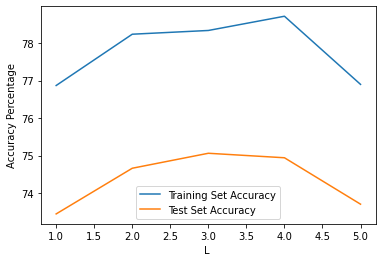

In [37]:
L = [1, 2, 3, 4, 5]
trainA = [76.87,78.24,78.34,78.72,76.9]
testA = [73.44,74.66,75.06,74.94,73.7]
time = [113.05,115.45,122.29,120.72,131.35]
plt.plot(L, trainA, label='Training Set Accuracy')
plt.plot(L, testA, label='Test Set Accuracy')
plt.legend(loc='lower center')
plt.xlabel('L ')
plt.ylabel('Accuracy Percentage')

Text(0, 0.5, 'Time')

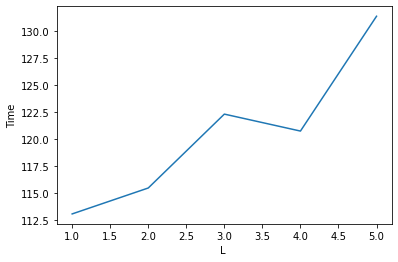

In [38]:
L = [1, 2, 3, 4, 5]
#trainA = [76.87,78.24,78.34,78.72,76.9]
#testA = [73.44,74.66,75.06,74.94,73.7]
time = [113.05,115.45,122.29,120.72,131.35]
#plt.plot(L, trainA, label='Training Set Accuracy')
#plt.plot(L, testA, label='Test Set Accuracy')
plt.plot(L, time, label='Time')

#plt.legend(loc='lower center')
plt.xlabel('L ')
plt.ylabel('Time')

In [ ]:
 = [1, 2, 3, 4, 5]
trainA = [76.87,78.24,78.34,78.72,76.9]
testA = [73.44,74.66,75.06,74.94,73.7]
time = [113.05,115.45,122.29,120.72,131.35]
plt.plot(L, trainA, label='Training Set Accuracy')
plt.plot(L, testA, label='Test Set Accuracy')
plt.legend(loc='lower center')
plt.xlabel('L ')
plt.ylabel('Accuracy Percentage')